## Meteor Data - Link: https://catalog.data.gov/dataset/meteorite-landings

In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import folium
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",None)
print(plt.style.available)
plt.style.use("bmh")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [60]:
df = pd.read_csv("Meteorite_Landings.csv")
for i in df['year']:
    if type(i) == np.float64:
        i = i.astype(np.int64)

print(type(df['year'][0]))
df.head()

<class 'numpy.float64'>


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [61]:
nrows,ncols = df.shape 
print(f"# of rows: {nrows}\n# of columns: {ncols}")

# of rows: 45716
# of columns: 10


In [62]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [63]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [64]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [65]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


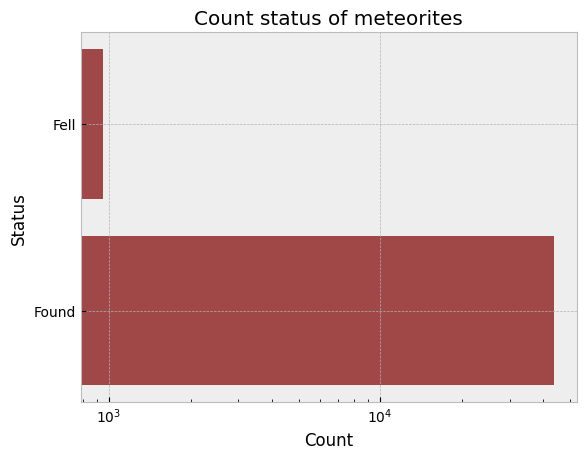

In [107]:
fall_cases = pd.DataFrame(df['fall'].value_counts())
plt.barh(fall_cases.index,fall_cases['count'],color='maroon',alpha=0.7)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Status")
plt.title("Count status of meteorites")
plt.show()

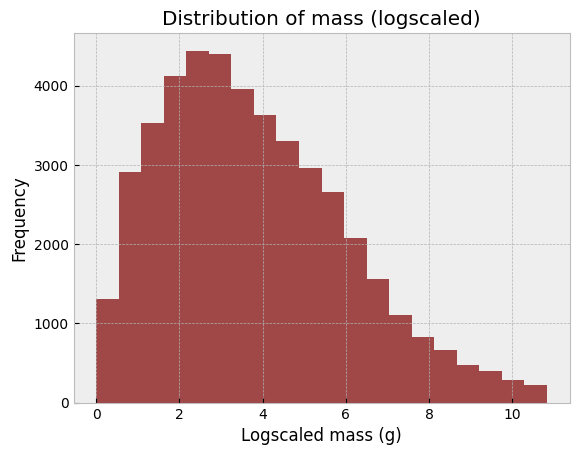

In [106]:

plt.hist(np.log1p(df['mass (g)']),bins=20,color='maroon',alpha=0.7)
plt.xlabel("Logscaled mass (g)")
plt.ylabel("Frequency")
plt.title("Distribution of mass (logscaled)")
plt.show()

In [68]:
np.max(df['year'])

2101.0

In [69]:
year_min, year_max = 1800, 2025 
mass_threshold = df['mass (g)'].quantile(0.99)  

df = df[
    (df['year'] >= year_min) &
    (df['year'] <= year_max) &
    (df['mass (g)'] <= mass_threshold) &
    df['mass (g)'].notna() &
    df['year'].notna() &
    df['fall'].notna()
]

df.shape


(44827, 10)

In [70]:
df['nametype'].value_counts()

nametype
Valid     44801
Relict       26
Name: count, dtype: int64

In [71]:
df.drop(df[df['nametype'] == 'Relict'].index,inplace=True)

In [72]:
df.drop(columns=['nametype'],inplace=True)

In [73]:
recclass_vals = pd.DataFrame(df['recclass'].value_counts().sort_values(ascending=False))

In [74]:
top_10_classes = recclass_vals[:10]
top_10_classes

,count
recclass,
L6,8190
H5,7058
L5,4731
H6,4500
H4,4172
LL5,2755
LL6,2034
L4,1210
H4/5,422


Text(0, 0.5, 'count')

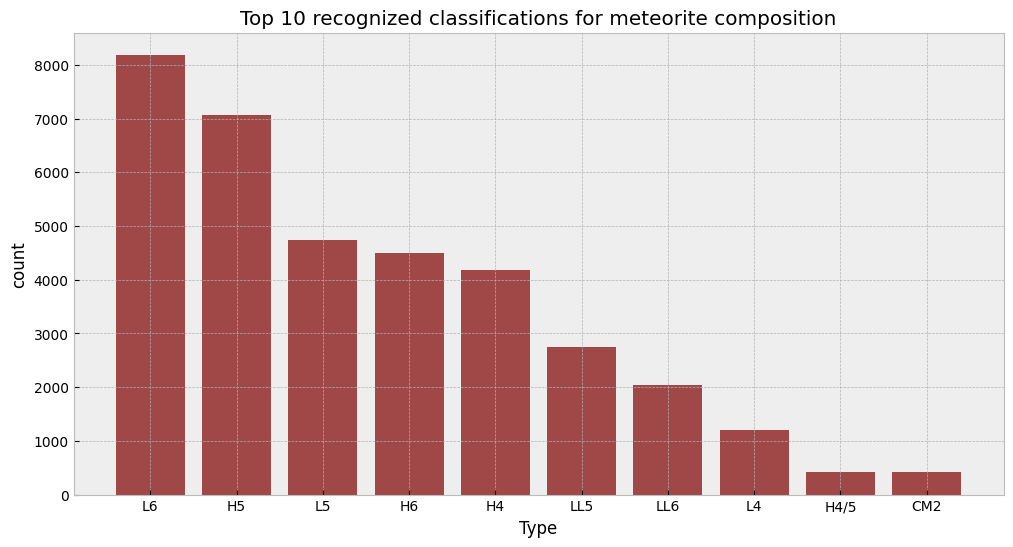

In [105]:
plt.figure(figsize=(12,6))
plt.bar(top_10_classes.index,top_10_classes['count'],color='maroon',alpha=0.7)
plt.title("Top 10 recognized classifications for meteorite composition")
plt.xlabel("Type")
plt.ylabel("count")

In [76]:
df.set_index("id",drop=True,inplace=True)
df.head()

,name,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,
1,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
10,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
379,Adhi Kot,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"


In [77]:
meteors_per_years = pd.DataFrame(df['year'].value_counts().sort_values(ascending=False))

In [78]:
top_10_years_meteors = meteors_per_years.iloc[:10]
top_10_years_meteors

,count
year,
2003.0,3320
1979.0,3044
1998.0,2688
2006.0,2445
1988.0,2294
2002.0,2065
2004.0,1935
2000.0,1770
1997.0,1688


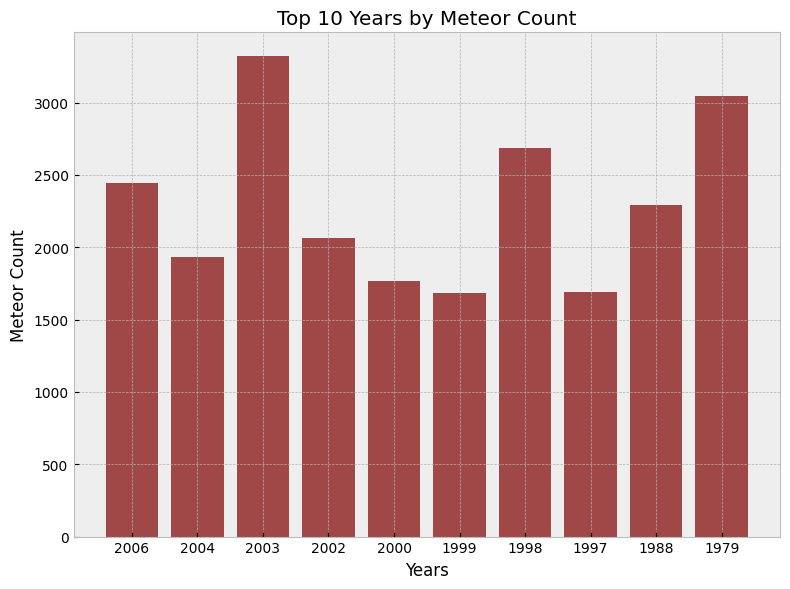

In [104]:
top_10_years_meteors = top_10_years_meteors.sort_index(ascending=False)

categories = [str(np.int64(i)) for i in top_10_years_meteors.index]
counts = top_10_years_meteors['count']

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='maroon',alpha=0.7)

plt.title('Top 10 Years by Meteor Count')
plt.xlabel('Years')
plt.ylabel('Meteor Count')
plt.tight_layout()
plt.show()


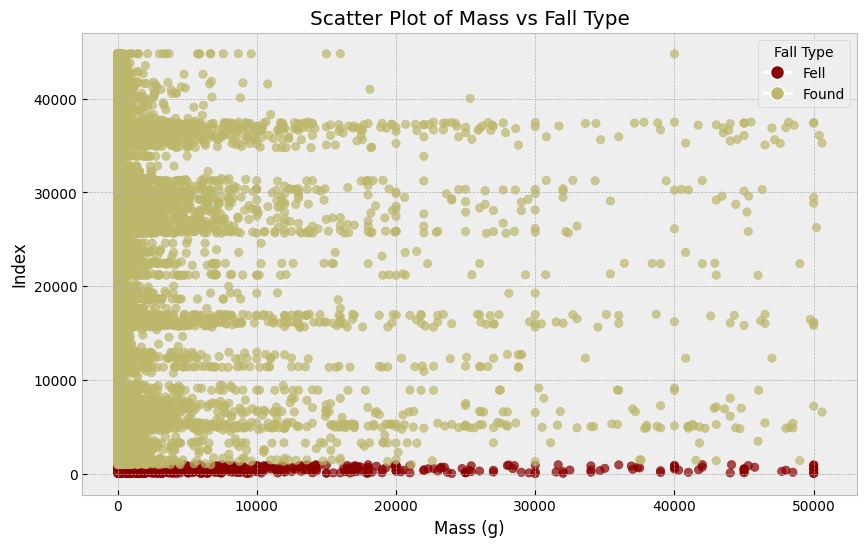

In [102]:
mass = df['mass (g)']
fall = df['fall']

filtered_data = df[(mass.notna()) & (fall.notna())]

# Map categories in 'fall' to colors
fall_categories = filtered_data['fall'].unique()
fall_colors = {cat: color for cat, color in zip(fall_categories, ['darkred', 'darkkhaki'])}

colors = filtered_data['fall'].map(fall_colors)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['mass (g)'], range(len(filtered_data)), c=colors, alpha=0.7)

# Add labels and title
plt.xlabel('Mass (g)')
plt.ylabel('Index')
plt.title('Scatter Plot of Mass vs Fall Type')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=fall_colors[cat],
                               markersize=10, label=cat) for cat in fall_categories], title="Fall Type")
plt.grid(True)
plt.show()


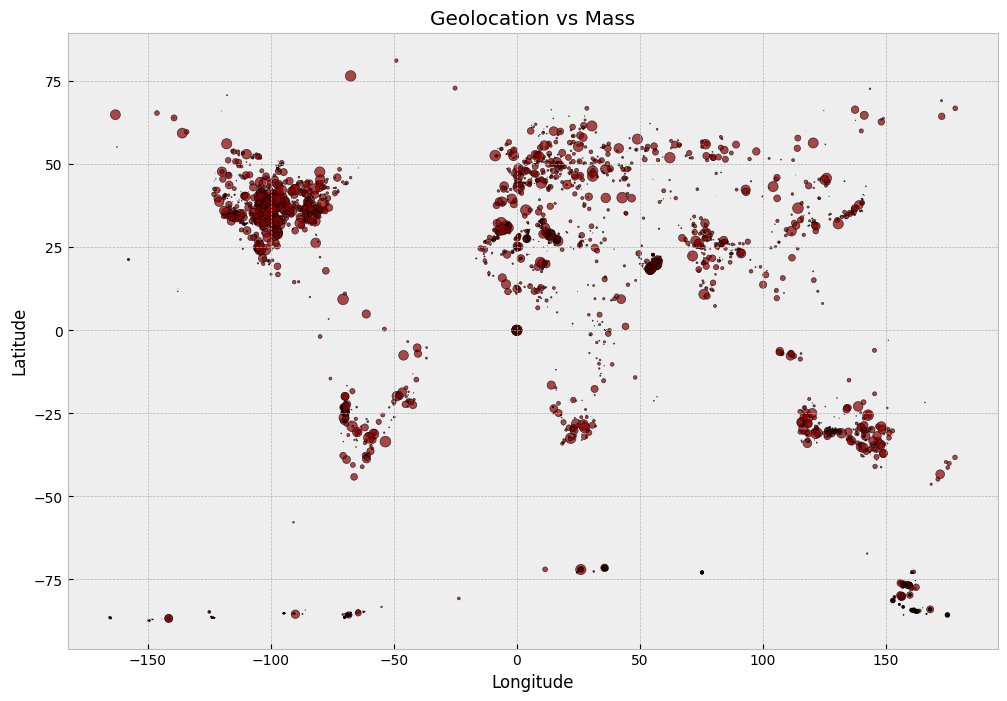

In [100]:
geo_filtered_data = df[
    df['mass (g)'].notna() & 
    df['reclat'].notna() & 
    df['reclong'].notna()
]

latitude = geo_filtered_data['reclat']
longitude = geo_filtered_data['reclong']
mass = geo_filtered_data['mass (g)']

normalized_mass = (mass / mass.max()) * 60

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(longitude, latitude, s=normalized_mass, alpha=0.7, c='darkred', edgecolor='k')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocation vs Mass')
plt.grid(True)
plt.show()


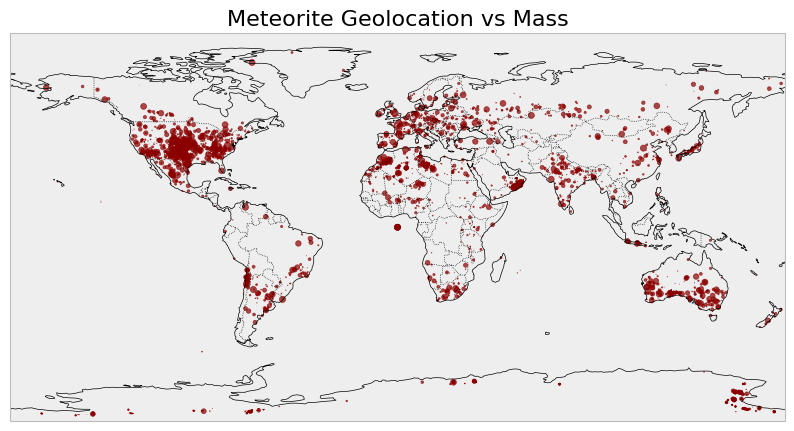

In [146]:

# Filter data for valid geolocation and mass
geo_filtered_data = df[
    df['mass (g)'].notna() & 
    df['reclat'].notna() & 
    df['reclong'].notna()
]

latitude = geo_filtered_data['reclat']
longitude = geo_filtered_data['reclong']
mass = geo_filtered_data['mass (g)']

normalized_mass = (mass / mass.max()) * 20

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

scatter = ax.scatter(longitude, latitude, s=normalized_mass, c='darkred', alpha=0.7, transform=ccrs.PlateCarree())

# Add labels and title
plt.title('Meteorite Geolocation vs Mass', fontsize=16)
plt.show()


In [83]:
df

,name,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,
1,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
10,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
379,Adhi Kot,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
...,...,...,...,...,...,...,...,...
31356,Zillah 002,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
30409,Zinder,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
30410,Zlin,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


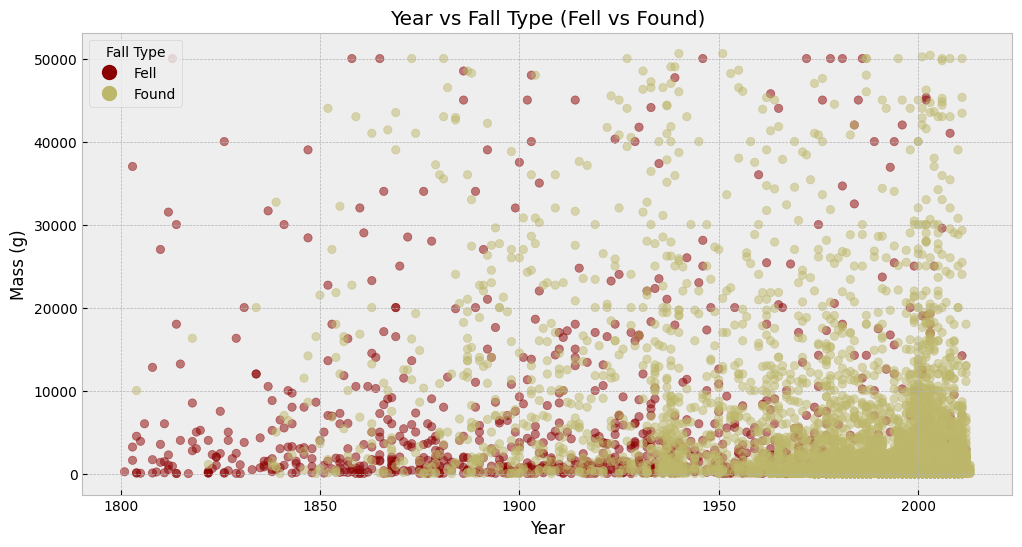

In [109]:
year = df['year']
fall = df['fall']
mass = df['mass (g)']

filtered_data = df[(year.notna()) & (fall.notna()) & (mass.notna())]

fall_colors = {'Fell': 'darkred', 'Found': 'darkkhaki'}
colors = filtered_data['fall'].map(fall_colors)

plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['year'], filtered_data['mass (g)'], c=colors, alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Mass (g)')
plt.title('Year vs Fall Type (Fell vs Found)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=fall_type)
                    for fall_type, color in fall_colors.items()], title="Fall Type")
plt.grid(True)
plt.show()


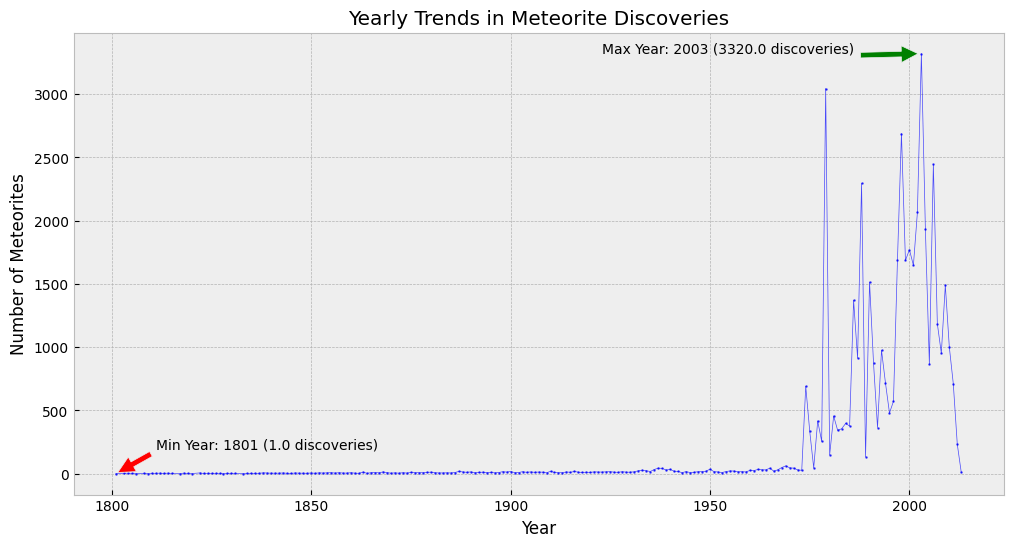

In [145]:
import math 

yearly_counts = df.groupby('year')['fall'].count().reset_index()
yearly_counts.columns = ['Year', 'Count']

# Find the minimum and maximum years
max_year = yearly_counts.loc[yearly_counts['Count'].idxmax()]
min_year = yearly_counts.loc[yearly_counts['Count'].idxmin()]

# Plot the yearly trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o', linestyle='-', color='blue',linewidth=0.5,markersize=0.8, alpha=0.7)

# Annotate the maximum year
plt.annotate(f'Max Year: {int(max_year["Year"])} ({max_year["Count"]} discoveries)',
             xy=(max_year['Year'], max_year['Count']),
             xytext=(max_year['Year'] - 80, max_year['Count'] + 10),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10)

# Annotate the minimum year
plt.annotate(f'Min Year: {int(min_year["Year"])} ({min_year["Count"]} discoveries)',
             xy=(min_year['Year'], min_year['Count']),
             xytext=(min_year['Year'] + 10, min_year['Count'] +200),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10)


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.title('Yearly Trends in Meteorite Discoveries')
plt.grid(True)
plt.show()


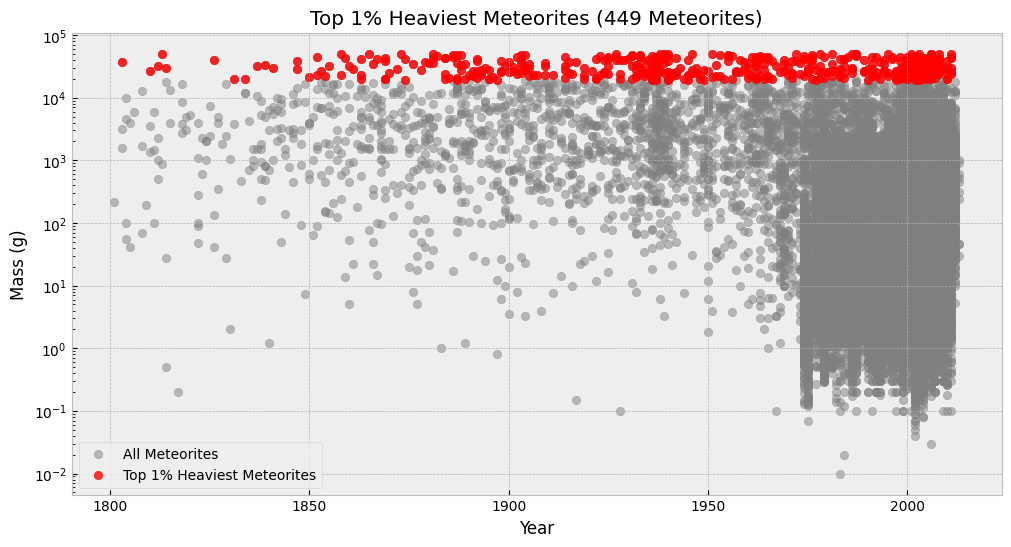

recclass
L6             65
H5             56
Iron, IIIAB    49
H4             33
L5             30
               ..
CV3             1
Iron, IIE       1
H3.8-4          1
H5/6            1
CO3.3           1
Name: count, Length: 77, dtype: int64

In [148]:
top_1_percent_threshold = df['mass (g)'].quantile(0.99)

top_1_percent_meteorites = df[df['mass (g)'] >= top_1_percent_threshold]

top_1_percent_count = top_1_percent_meteorites.shape[0]

plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['mass (g)'], alpha=0.5, label='All Meteorites', color='gray')
plt.scatter(
    top_1_percent_meteorites['year'],
    top_1_percent_meteorites['mass (g)'],
    color='red',
    alpha=0.8,
    label='Top 1% Heaviest Meteorites'
)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Mass (g)')
plt.yscale('log')  
plt.title(f'Top 1% Heaviest Meteorites ({top_1_percent_count} Meteorites)')
plt.legend()
plt.grid(True)
plt.show()

# Show the rare classifications (recclass) in the top 1% data
rare_classifications = top_1_percent_meteorites['recclass'].value_counts()

# Display the rare classifications
rare_classifications


In [153]:
top_1_percent_threshold = df['mass (g)'].quantile(0.99)

top_1_percent_meteorites = df[
    (df['mass (g)'] >= top_1_percent_threshold) &
    df['reclat'].notna() &
    df['reclong'].notna()
]

map_center = [top_1_percent_meteorites['reclat'].mean(), top_1_percent_meteorites['reclong'].mean()]
meteorite_map = folium.Map(location=map_center, zoom_start=2)

for _, row in top_1_percent_meteorites.iterrows():
    folium.CircleMarker(
        location=[row['reclat'], row['reclong']],
        radius=min((row['mass (g)'] / top_1_percent_meteorites['mass (g)'].max()) * 2, 20),  
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=f"Name: {row['name']}<br>Mass: {row['mass (g)']} g<br>Year: {row['year']}"
    ).add_to(meteorite_map)
meteorite_map